In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

### LOAD JSON INTO CSV

In [2]:
house_data_json = json.load(open('extracted_data.json', 'r'))
house_data = pd.DataFrame()
print(">> Dataset size:", len(house_data_json))

for house_info in house_data_json:
    house_info = pd.DataFrame(house_info, index=[0])
    house_data = pd.concat([house_data, house_info], ignore_index=True)

house_data.head()

>> Dataset size: 200


,Số phòng ngủ,Diện tích,Diện tích_unit,Giá,Giá_unit,Mặt tiền,Mặt tiền_unit,Đường vào,Đường vào_unit,Số tầng,Số tầng_unit,Số phòng vệ sinh,Pháp lý,Ngày đăng,Ngày hết hạn,Hướng nhà,Hướng ban công
0,6.0,105.0,m,16.0,Tỷ,4.6,m,15.0,m,5.0,tầng,4,Sổ đỏ/ Sổ hồng,08/02/2023,18/02/2023,NaN,NaN
1,6.0,86.0,m,3.9,Tỷ,6.7,m,3.0,m,4.0,tầng,NaN,Sổ đỏ/ Sổ hồng,22/11/2022,02/12/2022,NaN,NaN
2,NaN,183.0,m,20.0,Tỷ,9.0,m,26.0,m,NaN,NaN,NaN,Sổ đỏ/ Sổ hồng,27/02/2023,09/03/2023,NaN,NaN
3,6.0,56.0,m,5.5,Tỷ,5.0,m,6.0,m,5.0,tầng,4,Sổ đỏ/ Sổ hồng,05/04/2023,15/04/2023,NaN,NaN
4,7.0,286.0,m,116.0,Tỷ,21.0,m,30.0,m,3.0,tầng,NaN,Sổ đỏ/ Sổ hồng,18/04/2023,18/04/2023,NaN,NaN


In [3]:
# Dataset size
house_data.shape

(200, 17)

In [4]:
 # Details on columns in dataset: name, non-null count, data type
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Số phòng ngủ      156 non-null    float64
 1   Diện tích         197 non-null    float64
 2   Diện tích_unit    197 non-null    object 
 3   Giá               188 non-null    float64
 4   Giá_unit          188 non-null    object 
 5   Mặt tiền          164 non-null    float64
 6   Mặt tiền_unit     164 non-null    object 
 7   Đường vào         197 non-null    float64
 8   Đường vào_unit    197 non-null    object 
 9   Số tầng           168 non-null    float64
 10  Số tầng_unit      168 non-null    object 
 11  Số phòng vệ sinh  147 non-null    object 
 12  Pháp lý           200 non-null    object 
 13  Ngày đăng         200 non-null    object 
 14  Ngày hết hạn      200 non-null    object 
 15  Hướng nhà         27 non-null     object 
 16  Hướng ban công    27 non-null     object 
dt

In [5]:
# Number of unique values within each column
house_data.nunique()

Số phòng ngủ         15
Diện tích            76
Diện tích_unit        1
Giá                 104
Giá_unit              2
Mặt tiền             39
Mặt tiền_unit         1
Đường vào            29
Đường vào_unit        1
Số tầng              15
Số tầng_unit          1
Số phòng vệ sinh     16
Pháp lý               3
Ngày đăng           125
Ngày hết hạn        122
Hướng nhà             4
Hướng ban công        2
dtype: int64

In [6]:
# Unique values within each unit column
print(">> Diện tích:", house_data['Diện tích_unit'].unique().tolist())
print(">> Giá:", house_data['Giá_unit'].unique().tolist())
print(">> Mặt tiền:", house_data['Mặt tiền_unit'].unique().tolist())
print(">> Đường vào:", house_data['Đường vào_unit'].unique().tolist())
print(">> Số tầng:", house_data['Số tầng_unit'].unique().tolist())

>> Diện tích: ['m', nan]
>> Giá: ['Tỷ', nan, 'Triệu']
>> Mặt tiền: ['m', nan]
>> Đường vào: ['m', nan]
>> Số tầng: ['tầng', nan]


In [7]:
# Unique values within categorical columns
print(">> Pháp lý:", house_data['Pháp lý'].unique().tolist())
print(">> Hướng nhà:", house_data['Hướng nhà'].unique().tolist())
print(">> Hướng ban công:", house_data['Hướng ban công'].unique().tolist())

>> Pháp lý: ['Sổ đỏ/ Sổ hồng', 'Đang chờ sổ', 'Hợp đồng mua bán']
>> Hướng nhà: [nan, 'KXĐ', 'Đông Nam', 'Nam', 'Tây']
>> Hướng ban công: [nan, 'KXĐ', 'Nam']


>> Pháp lý: Pháp lý
Sổ đỏ/ Sổ hồng      194
Đang chờ sổ           5
Hợp đồng mua bán      1
Name: count, dtype: int64
>> Hướng nhà: Hướng nhà
NaN         173
KXĐ          24
Đông Nam      1
Nam           1
Tây           1
Name: count, dtype: int64
>> Hướng ban công: Hướng ban công
NaN    173
KXĐ     26
Nam      1
Name: count, dtype: int64


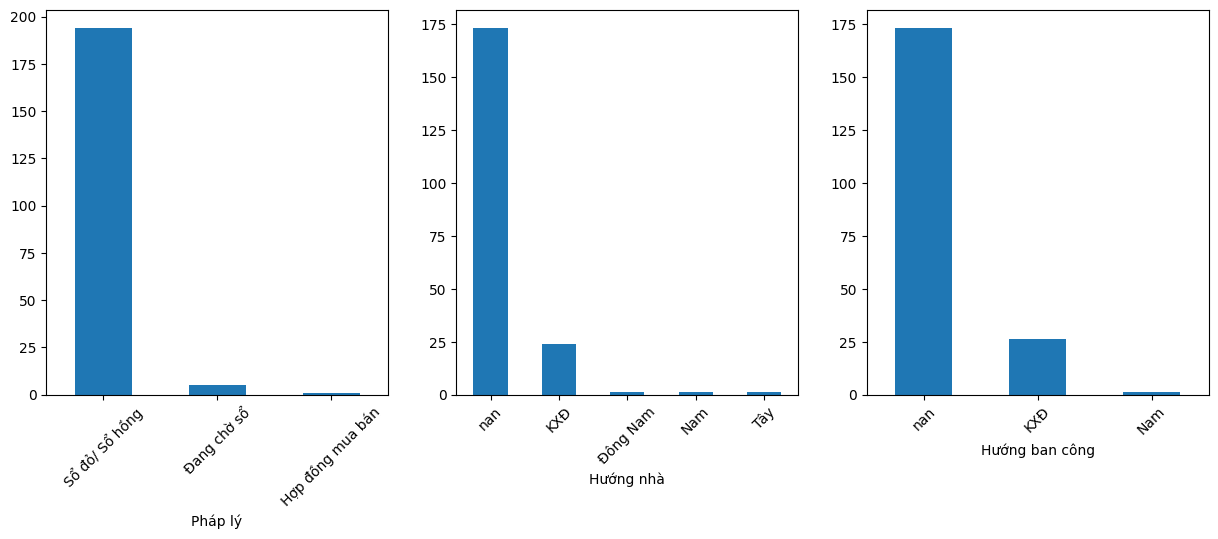

In [8]:
# Analyze distribution within categorical columns. including NaN counts.
print(">> Pháp lý:", house_data['Pháp lý'].value_counts(dropna=False))
print(">> Hướng nhà:", house_data['Hướng nhà'].value_counts(dropna=False))
print(">> Hướng ban công:", house_data['Hướng ban công'].value_counts(dropna=False))

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
house_data['Pháp lý'].value_counts(dropna=False).plot(kind='bar', ax=axes[0], rot=45)
house_data['Hướng nhà'].value_counts(dropna=False).plot(kind='bar', ax=axes[1], rot=45)
house_data['Hướng ban công'].value_counts(dropna=False).plot(kind='bar', ax=axes[2], rot=45)

plt.show()

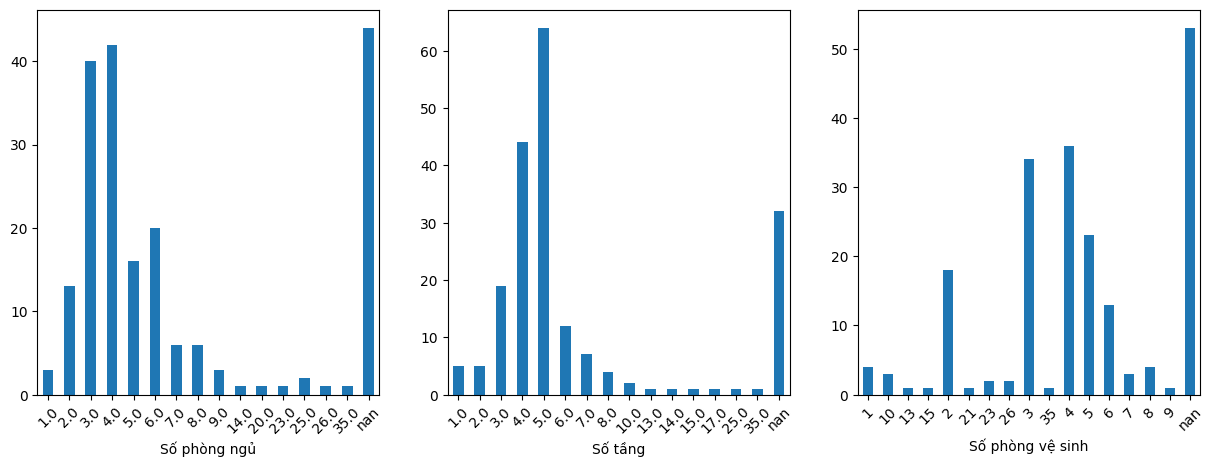

In [12]:
# Plot the distribution of number of bedrooms, number of stories, number of bathrooms, with x-axis in order
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
house_data['Số phòng ngủ'].value_counts(dropna=False).sort_index().plot(kind='bar', ax=axes[0], rot=45)
house_data['Số tầng'].value_counts(dropna=False).sort_index().plot(kind='bar', ax=axes[1], rot=45)
house_data['Số phòng vệ sinh'].value_counts(dropna=False).sort_index().plot(kind='bar', ax=axes[2], rot=45)

plt.show()

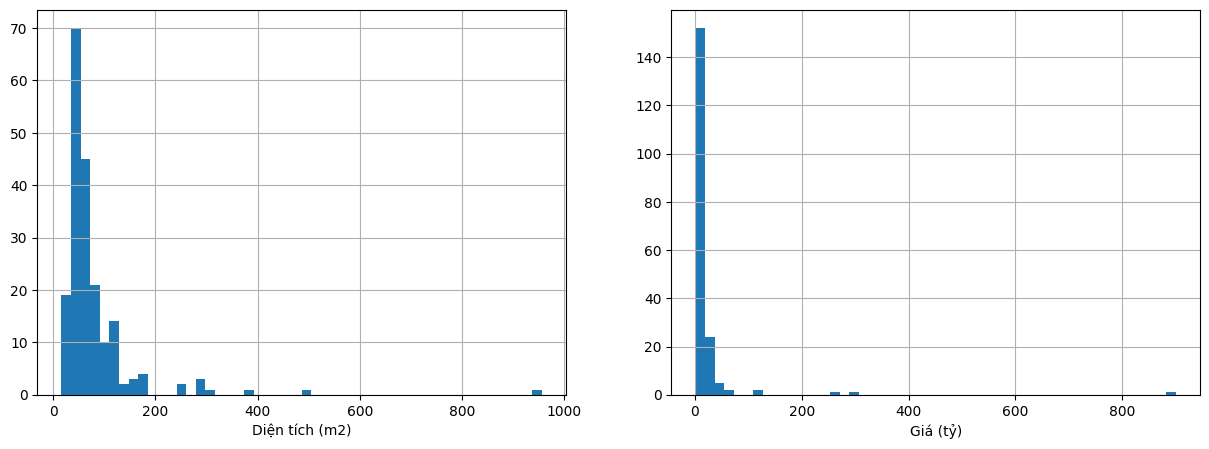

In [17]:
# Plot histogram of house area and price, with x-axis in order
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
house_data['Diện tích'].hist(ax=axes[0], bins=50)
axes[0].set_xlabel('Diện tích (m2)')
house_data['Giá'].hist(ax=axes[1], bins=50)
axes[1].set_xlabel('Giá (tỷ)')

plt.show()

# --- THE PLOT FOR PRICE IS WRONG, SOME VALUES ARE IN MILLIONS, SOME ARE IN BILLIONS ---

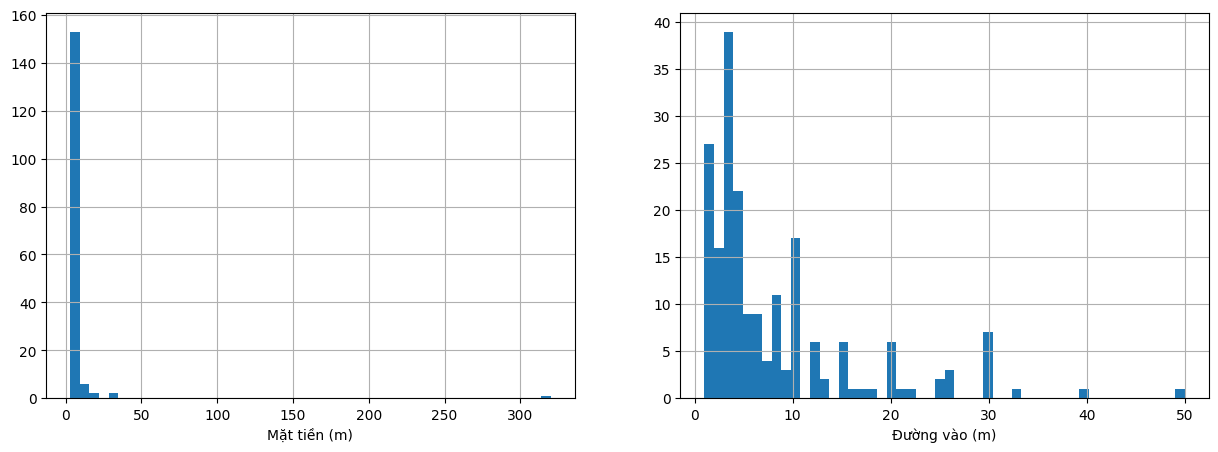

In [18]:
# Plot histogram of fronthouse and road, with x-axis in order
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
house_data['Mặt tiền'].hist(ax=axes[0], bins=50)
axes[0].set_xlabel('Mặt tiền (m)')
house_data['Đường vào'].hist(ax=axes[1], bins=50)
axes[1].set_xlabel('Đường vào (m)')

plt.show()

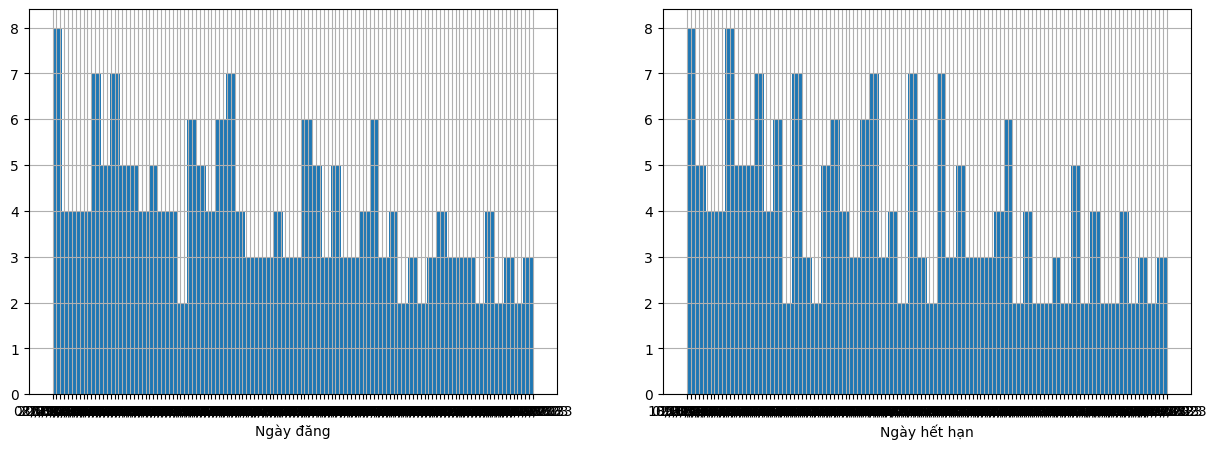

In [21]:
# Plot histogram of the date the ad was posted, and the date the ad is due, with x-axis in order
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
house_data['Ngày đăng'].hist(ax=axes[0], bins=50)
axes[0].set_xlabel('Ngày đăng')
house_data['Ngày hết hạn'].hist(ax=axes[1], bins=50)
axes[1].set_xlabel('Ngày hết hạn')

plt.show()

# --- MAYBE IT'D BE BETTER JUST TO TAKE THE MONTH AND YEAR OF THE DATE ---
# --- AND THEN PLOT A LINE GRAPH OF THE NUMBER OF ADS POSTED PER MONTH/YEAR ---

### END EDA